# Paper TMDs

In [1]:
### IMPORTS ###
folder0 = ''

import os
import sys
sys.path.append(folder0)
from Func_Floquet_classes import *
from matplotlib import cm
from IPython.display import Math
from sympy.interactive import printing
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines
## Personalized plots
from matplotlib.lines import Line2D
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm,amsmath,amsfonts,amssymb,bbold}"
from Func_general import *
plotParams('paper')
%matplotlib inline

## Units conversion
import scipy.constants as sconst
from sympy.physics.quantum import TensorProduct as TP

###############################
### TMDs Hamiltonian Parameters:

parameters_TMDs={'a':3.193,'Delta':1.66,'t':1.10,'Lambda':0.15/2,'tau':1,'W':1}
parameters_Polarization={'theta':np.pi/2}
pTMDs = SimpleNamespace(**parameters_TMDs, **parameters_Polarization)


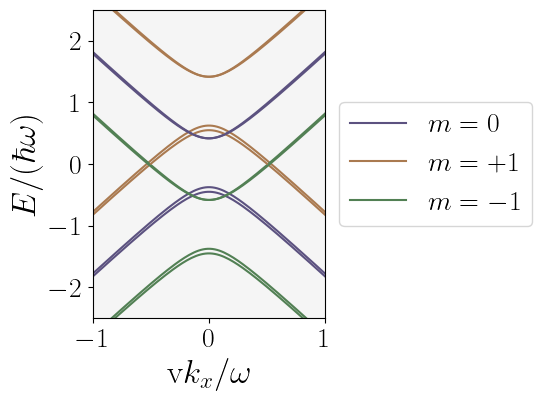

In [2]:
## Schematic plot of the bands:
# Define parameters
a, t, tau, Delta, Lambda, W = 3.193, 1.10, 1, 1.66, 0.15/2, 1/2 
k_x, k_y = sp.symbols('k_x k_y', real=True)

s0 = sp.Matrix([[1, 0], [0, 1]])
sx = sp.Matrix([[0, 1], [1, 0]])
sy = sp.Matrix([[0, -sp.I], [sp.I, 0]])
sz = sp.Matrix([[1, 0], [0, -1]])

h0_k = (a * t * (tau * k_x * TP(sx, s0) + k_y * TP(sy, s0)) +
        Delta / 2 * TP(sz, s0) -
        Lambda * tau / 2 * (TP(sz, sz) - TP(s0, sz))) * W

eigenvalues = sp.Matrix(list(h0_k.eigenvals().keys()))
eigenvalues_funcs = [sp.lambdify((k_x, k_y), ev) for ev in eigenvalues]


kx_vals = np.linspace(-2, 2, 200)
ky_val = 0 

eigenenergies = []
for func in eigenvalues_funcs:
    eigenenergies.append([func(kx, ky_val) for kx in kx_vals])


fig, ax = plt.subplots(figsize=(3, 4)) 
ax.set_facecolor('#F5F5F5')  

for band in eigenenergies:
    ax.plot(kx_vals, np.array(band), color='#5C5280' , label=r'$m=0$')     
    ax.plot(kx_vals, np.array(band)+1, color='#AA7A50', label=r'$m=+1$')      
    ax.plot(kx_vals, np.array(band)-1, color='#528054', label=r'$m=-1$')      


line_original = mlines.Line2D([], [], color='#5C5280' , label=r'$m=0$')
line_mas = mlines.Line2D([], [], color='#AA7A50', label=r'$m=+1$')
line_menos = mlines.Line2D([], [], color='#528054', label=r'$m=-1$')

ax.set_xlabel(r'$\mathrm{v}k_x/\omega$')
ax.set_ylabel(r'$E/(\hbar \omega)$')
ax.set_ylim([-4, 4])


ax.legend(handles=[line_original, line_mas, line_menos],loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel(r'$\mathrm{v}k_x/\omega$')
ax.set_ylabel(r'$E/(\hbar \omega)$')
ax.set_ylim([-2.5, 2.5])
ax.set_xlim([-1, 1])

plt.show()
plt.close()

## Floquet Hamiltonian

In [4]:
ham_symbols = sp.symbols("a Delta t Lambda tau theta W", real=True)
ham_dict = {str(b): b for b in ham_symbols}
locals().update( ham_dict)

hTMDs = Hamiltonian(
    h0_k = (a*t*(tau*k_x*(TP(sx,s0))+k_y*TP(sy,s0))+Delta/2*TP(sz,s0)-Lambda*tau/2*(TP(sz,sz)-TP(s0,sz)))* W,
    Axt=A_x * sp.sin(2 * sp.pi / T_p * t_sp+ theta),
    Ayt=A_y * sp.sin(2 * sp.pi / T_p * t_sp), 
    ham_symbols=ham_symbols)

par_var = {'k_x': None, 'k_y': None, 'A_x': None, 'A_y': None}
par_fix = {'a' : pTMDs.a, 't': pTMDs.t, 'tau': pTMDs.tau, 'Lambda': pTMDs.Lambda,'Delta': pTMDs.Delta,'theta': pTMDs.theta,'W':pTMDs.W}
par_fix_b = {'a' : pTMDs.a, 't': pTMDs.t, 'tau': -pTMDs.tau, 'Lambda': pTMDs.Lambda,'Delta': pTMDs.Delta,'theta': pTMDs.theta,'W':pTMDs.W}

hTMDsFF = Hamiltonian_FloquetFourier(hTMDs ,par_var, par_fix =  par_fix,  N = 10)
hTMDsFF_b = Hamiltonian_FloquetFourier(hTMDs ,par_var, par_fix =  par_fix_b,  N = 10)

from IPython.display import Math
from sympy.interactive import printing

Math('{}'.format(printing.default_latex(hTMDs.fourier_elements(1))))

<IPython.core.display.Math object>

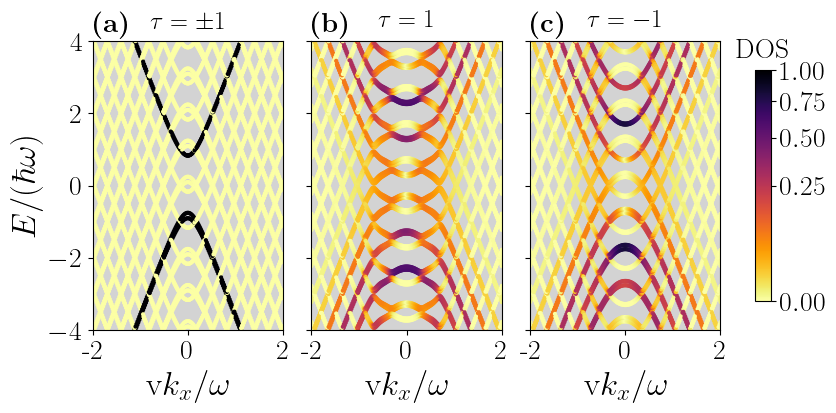

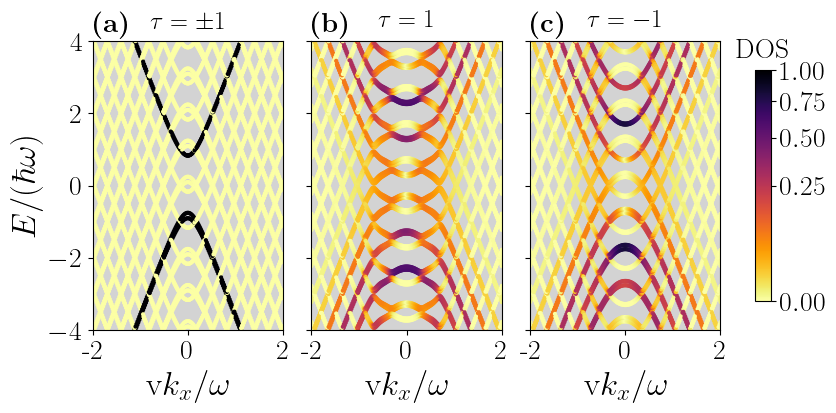

In [5]:
momentax = np.linspace(-2, 2, 201) 
fig, axs = plt.subplots(1, 3, figsize=(12 * 0.75, 5*0.75), sharey=True, sharex=True)
plt.subplots_adjust(wspace=0.15)  

Aval = 0.5

par = {'k_y': 0., 'A_x': 0.001, 'A_y': 0.001}
obs = ObservablesFF(hTMDsFF, 'k_x', momentax, params=par)
out = obs.timeAveragedDOS(ax=axs[0], Nmax=10, cbar=False, fig=fig, axs=axs)
axs[0].set_title(r'$\tau=\pm 1$', fontsize=18, pad=10)

# τ = 1
par = {'k_y': 0., 'A_x': Aval, 'A_y': Aval}
obs = ObservablesFF(hTMDsFF, 'k_x', momentax, params=par)
out = obs.timeAveragedDOS(ax=axs[1], Nmax=10, cbar=False, fig=fig, axs=axs)
axs[1].set_title(r'$\tau = 1$', fontsize=18, pad=10)
axs[1].set(ylabel=None)

# τ = -1
par = {'k_y': 0., 'A_x': Aval, 'A_y': Aval}
obs = ObservablesFF(hTMDsFF_b, 'k_x', momentax, params=par)
out = obs.timeAveragedDOS(ax=axs[2], Nmax=10, cbar=True, fig=fig, axs=axs, pad=0.05)
axs[2].set_title(r'$\tau = -1$', fontsize=18, pad=10)
axs[2].set(ylabel=None)

axs[0].set(ylabel=r'$E/(\hbar \omega)$', ylim=(-4, 4), xlim=(-2, 2))
for ax in axs:
    ax.set(xlabel=r'$\mathrm{v}k_x/\omega$')
    ax.set(xticks=[-2, 0, 2], xticklabels=[-2, 0, 2])

createletters(axs, coord=[0., 1.03])

fig

## t-t' formalism

In [4]:
def TP(mat1, mat2):
    """Compute the Kronecker (tensor) product of two matrices."""
    return sp.Matrix(sp.kronecker_product(mat1, mat2))

parameters_TMDs={'a':3.193,'Delta':1.66,'t':1.10,'Lambda':0.15/2,'tau':1,'W':1/1}
pTMDs = SimpleNamespace(**parameters_TMDs)

par_var = {'k_x': None, 'k_y': None, 'A_x': None, 'A_y': None}
ham_symbols = sp.symbols("a t tau Lambda Delta theta mu_sp tau_sp W alpha", real=True)
ham_dict = {str(b): b for b in ham_symbols}
locals().update( ham_dict)

par_fix = {'a' : pTMDs.a, 't': pTMDs.t, 'Lambda': pTMDs.Lambda,'Delta': pTMDs.Delta,
           'theta': np.pi/2, 'T_p':1, 'W':pTMDs.W}
params_ham = {'k_x' :None, 'k_y' : None,'tau':None}

h_pulse = Hamiltonian_ttp(
    h0_k = W*( a*t*(tau*k_x*(TP(sx,s0))+k_y*TP(sy,s0))+Delta/2*TP(sz,s0)-Lambda*tau/2*(TP(sz,sz)-TP(s0,sz))),
    par_var_ham = params_ham,
    par_fix = par_fix,
    Vxt= sp.cos(2 * sp.pi / T_p * t_sp),
    Vyt= sp.sin(2 * sp.pi / T_p * t_sp),
    Axenv = A_x * sp.exp(-((t_sp-mu_sp)/(tau_sp))**2),
    Ayenv = A_y * sp.exp(-((t_sp-mu_sp)/(tau_sp))**2) ,
    ham_symbols=ham_symbols,
    N = 40)  ## We reduce the number of Fourier replicas to speed up a bit the loop

##%%
calc = False
ts = np.linspace(1e-4, 7.1, 2200)
ks = np.arange(-2, 2, 0.05) + 1e-3  ## offset to avoid the numerical degenerancy at the DirP
Aval = 0.7
psi0band = 1

params_env = {'mu_sp': 3.5, 'tau_sp': 1., 'A_x': Aval, 'A_y': Aval, 'A_z': 0.}

tau_valley = 1 ## Select the valley index for computations.

folderin = 'Data_ifs' if tau_valley == +1 else 'Data_ifs_tauNeg'
if calc:
    for kx in ks:
        params_ham = {'k_x': kx, 'k_y': 0.0, 'tau': tau_valley}

        name = folder0 + 'FigsPaper/{}/Ct_Ax{:.2f}_Ay{}_kx{:.4f}_ky{}.npz'.format(
            folderin, params_env['A_x'], params_env['A_y'], kx, params_ham['k_y'], )

        params_full = {**params_ham}
        solver_ifs = IFS_solver(h_pulse, ts, params_env, params_full, Nmax = 6)
        ct0, psitsol0 = solver_ifs.c_t(psi0band=0, tend=7., psi_t=True)
        ct1, psitsol1 = solver_ifs.c_t(psi0band=1, tend=7., psi_t=True)
        ct2, psitsol2 = solver_ifs.c_t(psi0band=2, tend=7., psi_t=True)
        ct3, psitsol3 = solver_ifs.c_t(psi0band=3, tend=7., psi_t=True)
        UsC= h_pulse.time_evolutionU(dict(**params_env, **params_ham, **par_fix), ts, steps = True)

        np.savez(name,
                 ts=ts, ct=np.array([ct0, ct1, ct2, ct3]),
                 psitsol=np.array([psitsol0, psitsol1, psitsol2, psitsol3]),
                 e0=nla.eigvalsh(solver_ifs.ham0),
                 UsC=UsC, eL=solver_ifs.eL, tagvec=solver_ifs.tag_fqlevels(),
                 indexCbase = solver_ifs.indexCbase)

else:

    def import_data(kx):
        params_ham = {'k_x': kx, 'k_y': 0.0}
        name = folder0 + 'FigsPaper/{}/Ct_Ax{:.2f}_Ay{}_kx{:.4f}_ky{}.npz'.format(
            folderin,params_env['A_x'], params_env['A_y'], kx, params_ham['k_y'], )
        return np.load(name)
    data= []
    for kx in ks:
        params_ham = {'k_x': kx, 'k_y': 0.0, }
        datai= import_data(kx)
        data.append({'tagvec' :datai['tagvec'], 'indexCbase' : datai['indexCbase'],
                     'eL': datai['eL'], 'ct' :datai['ct'][psi0band],
                     'psit': datai['psitsol'][psi0band]})
    ts = datai['ts']



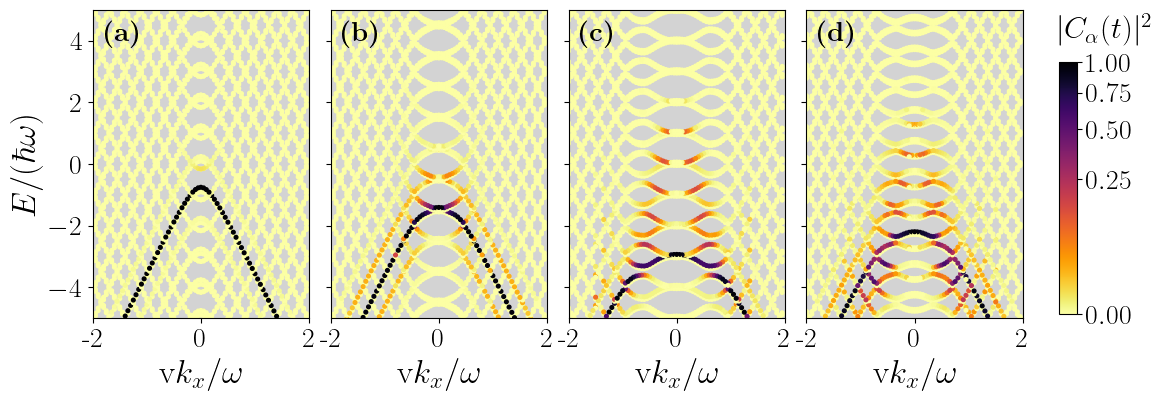

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(3 * 4, 4), sharey=True, sharex=True)
plt.subplots_adjust(wspace=0.1, hspace=0.08)

# Selecting some time_indices to visualize the spectra. In this case indices are [0,1,3,4]
# to change valley index we need to select tau_valley in previous cell

t_sel = np.array([-2, -1, -0.2, 0, 0.6, 1., 2.]) + params_env['mu_sp']
selected_indices = [0, 1, 3, 4]
t_sel_selected = t_sel[selected_indices]
inds_t = [np.argmin(np.abs(ts - ti)) for ti in t_sel_selected]

cmap = mpl.colormaps['inferno_r']
norm = mpl.colors.PowerNorm(vmin=0, vmax=1, gamma=0.45)


for ti, ax in zip(inds_t, axs.ravel()):
    eL = np.array([datai['eL'][ti] for datai in data])
    ct_k = np.array([datai['ct'] for datai in data])
    indexCbase_k = np.array([datai['indexCbase'] for datai in data])
    col_k = np.abs(ct_k[:, ti]) ** 2
    ensL = np.array([eL[ki, indexCbase_k[ki]] for ki in range(len(data))])  

    for nband in range(len(indexCbase_k[0])):
        ks_flat = ks
        ensL_flat = ensL[:, nband]
        col_k_flat = col_k[:, nband]

        sorted_indices = np.argsort(col_k_flat)
        ks_sorted = ks_flat[sorted_indices]
        ensL_sorted = ensL_flat[sorted_indices]
        col_k_sorted = col_k_flat[sorted_indices]
        z1 = ax.scatter(ks_sorted, ensL_sorted, c=col_k_sorted, s=7, cmap=cmap, norm=norm)

    ax.set(facecolor='lightgrey')
    ax.set(xlim=(-2, 2), ylim=(-5, 5))

axs[0].set_ylabel(r'$E/(\hbar \omega)$')

for ax in axs:
    ax.set_xlabel(r'$\mathrm{v}k_x/\omega$')
    ax.set(xticks=[-2, 0, 2], xticklabels=[-2, 0, 2])

# Configurar la barra de color
cbar_pos = fig.add_axes([0.93, 0.12, 0.015, 0.63])  # [left, bottom, width, height]

cbar_ax = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm),
                       ax=axs, pad=0.05, shrink=0.25, aspect=20, fraction=0.03, cax=cbar_pos)
cbar_ax.ax.set_title(r'$|C_\alpha(t)|^2$', fontsize=22, y=1.15, pad=-10, loc='left')

createletters(axs.ravel(), coord=[0.05, 0.9])

fig;


## Gamma // Theta dependance

In [10]:
parameters_TMDs={'a':3.193,'Delta':1.66,'t':1.10,'Lambda':0.15/2,'tau':1,'W':1}
parameters_Polarization={'theta':np.pi/2}
pTMDs = SimpleNamespace(**parameters_TMDs, **parameters_Polarization)

params_ham = {'k_x' : 0.01 ,'k_y' : 0.0, 'alpha':3*np.pi/2}
par_fix = {'a' : pTMDs.a, 't': pTMDs.t, 'tau': pTMDs.tau, 'Lambda': pTMDs.Lambda,'Delta': pTMDs.Delta,'theta': pTMDs.theta, 'T_p':1,'W':pTMDs.W}
par_fix_b = {'a' : pTMDs.a, 't': pTMDs.t, 'tau': -pTMDs.tau, 'Lambda': pTMDs.Lambda,'Delta': pTMDs.Delta,'theta': pTMDs.theta, 'T_p':1,'W':pTMDs.W}


ham_symbols = sp.symbols("a t tau Lambda Delta theta mu_sp tau_sp W alpha", real=True)
ham_dict = {str(b): b for b in ham_symbols}
locals().update( ham_dict)

hTMDs_pulse = Hamiltonian_ttp(
    h0_k = 
          W*( a*t*(tau*k_x*(TP(sx,s0))+k_y*TP(sy,s0))+Delta/2*TP(sz,s0)-Lambda*tau/2*(TP(sz,sz)-TP(s0,sz))),
    par_var_ham = params_ham,
    par_fix = par_fix,
    Vxt= sp.sin(2 * sp.pi / T_p * t_sp + alpha),
    Vyt= sp.sin(2 * sp.pi / T_p * t_sp), 
    Axenv = A_x * sp.exp(-((t_sp-mu_sp)/(tau_sp))**2),
    Ayenv = A_y * sp.exp(-((t_sp-mu_sp)/(tau_sp))**2) , 
    ham_symbols=ham_symbols,
    N = 10) 

## Data Figure 2 ###
calc = True

psi0band, T = 0, 1.
ts = np.linspace(0, 8* T, 3000) + 1e-4
ki=0.2
beta = 3*np.pi/2
taus = [0.5,1,1.5]

if calc:
    solverL1 = []
    data  = []
    for tau in taus:
        params_env = {'mu_sp' : 4., 'tau_sp' : tau , 'A_x': 0.3, 'A_y':0.3, 'A_z': 0}
        params_ham = {'k_x' : ki, 'k_y' : 0.0, 'alpha':beta}
        params_full = {**params_ham}
        solver_ki = IFS_solver(hTMDs_pulse, ts, params_env, params_full, Nmax = 5)
        params_env = {'mu_sp' : 4., 'tau_sp' : tau , 'A_x': 0.3, 'A_y': 0.3, 'A_z': 0}
        params_ham = {'k_x' : ki, 'k_y' : 0.0, 'alpha':beta}
        UsC= hTMDs_pulse.time_evolutionU(dict(**params_env, **params_ham, **par_fix), ts, steps = True)
        ct, psitsol = solver_ki.c_t(psi0band=psi0band, tend=7.99, psi_t=True)
        
        ts_ct = ts[:len(ct)]
        data.append({'tagvec':solver_ki.tag_fqlevels(),
                       'indexCbase' : solver_ki.indexCbase,
                       'eL':solver_ki.eL, 'ct':ct, 'psit':psitsol,
                     'psiTDSE': UsC@psitsol[0], 'ts' : ts, 'ts_ct': ts_ct, **params_env, **params_ham})
        np.save(folder0+'FigsPaper/A_03', data)
else:
    data = np.load(folder0+'FigsPaper/A_03.npy', allow_pickle=True)

State at t = 0.00 energy = -1.1537, wf (spinor): [ 0.   +0.j  0.334-0.j  0.   +0.j -0.943+0.j]
State at t = 0.00 energy = -1.1537, wf (spinor): [ 0.+0.j     0.+0.334j -0.+0.j     0.-0.943j]
State at t = 0.00 energy = -1.1532, wf (spinor): [ 0.   +0.j  0.334+0.j -0.   -0.j -0.943-0.j]


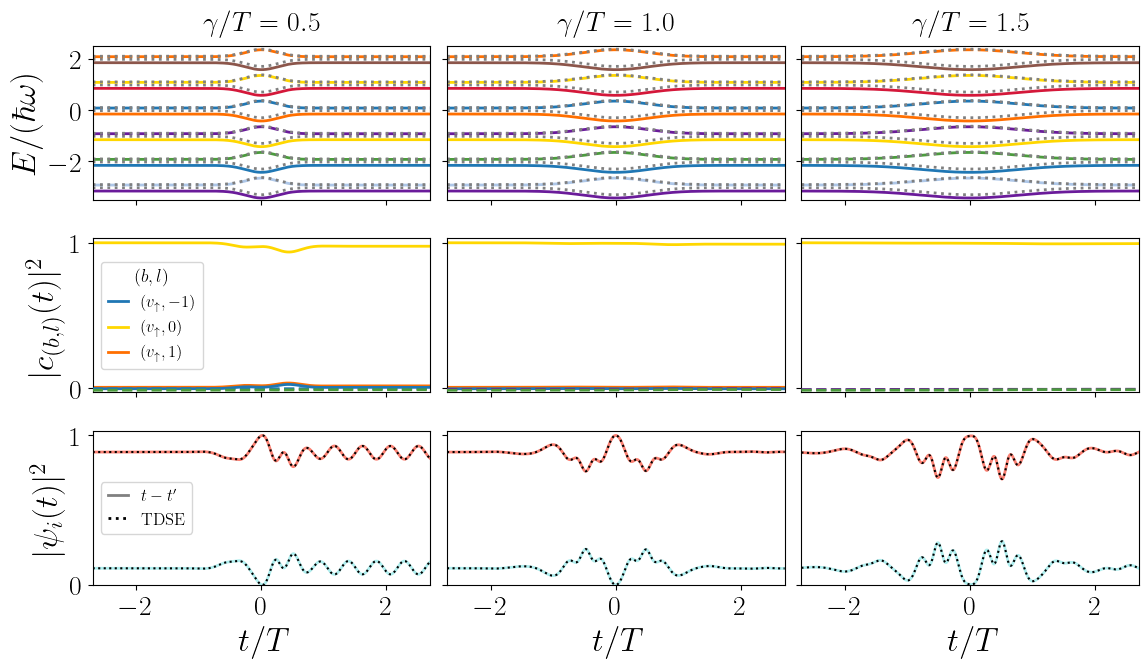

In [11]:
fig, axsall = plt.subplots(3,3, figsize=(13.5, 7), sharex=True, sharey='row', height_ratios=[2, 2, 2])
plt.subplots_adjust(hspace=0.25, wspace=0.05)

custom_colors = [
    '#7f7f7f',  '#aec7e8',  '#4B9B3D', '#6A1B9A', '#1F77B4', '#FFD700',
    '#FF6F00',  '#D4183A', '#8C564B', '#8C564B', '#9467BD',  '#E377C2',
    '#1F77B4',  '#BCBD22', '#98DF8A', '#FF9896'
]

cmap = mpl.colors.ListedColormap(custom_colors)
bounds = np.arange(-5.5, 10.6)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

def format_label(b, l):
    spin = '\\uparrow' if b % 2 == 0 else '\\downarrow'
    state = 'v' if b in [0, 1] else 'c'
    return f'$({state}_{spin},{l})$'

lines = [Line2D([0], [0], color='k', linewidth=2, linestyle=ls) for ls in ['-', '--',':','-.']]
lab_lines = ['$b = 0$', '$b = 1$','$b = 2$', '$b = 3$']

linespsit = [Line2D([0], [0], color=c, linewidth=2, linestyle=ls) for c, ls in zip(['grey', 'k'], ['-', ':'])]
lab_linespsit = ['$t-t^\\prime$', 'TDSE'] 

first_plot = True

for axs, datai in zip(axsall.T, data):
    for cti, i in enumerate(datai['indexCbase']):
        l, m = datai['tagvec'][i]
        ls = ['-', ':', '--', ':'][int(l)]
        color = 'gray' if ls == ':' else cmap(norm(m)) 
        label = format_label(int(l), int(m)) if (np.max(abs(datai['ct'][:, cti])) > 0.1) else None
        
        if np.max(datai['ct'][:, cti] ** 2) > 0.001:
            axs[1].plot(datai['ts_ct'] - 4, (np.abs(datai['ct'][:, cti]) ** 2) + 0.005 * m,
                        lw=2, c=color, zorder=-(m) + l, ls=ls, label=label)
        axs[0].plot(datai['ts'] - 4, datai['eL'][:, i], lw=2, c=color, ls=ls, label=label)

    axs[2].plot(datai['ts_ct'] - 4, np.abs(datai['psit'][:, 3]) ** 2, c='salmon', lw=2)
    axs[2].plot(datai['ts_ct'] - 4, np.abs(datai['psit'][:, 1]) ** 2, c='paleturquoise', lw=2)
    axs[2].plot(datai['ts'] - 4, np.abs(datai['psiTDSE'][:, 3]) ** 2, ls=':', c='k')
    axs[2].plot(datai['ts'] - 4, np.abs(datai['psiTDSE'][:, 1]) ** 2, ls=':', c='k')  

    if first_plot:
        axs[2].legend(linespsit, lab_linespsit, handlelength=1.2, fontsize=12, loc='center left')
        handles, labels = axs[1].get_legend_handles_labels()
        labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
        lg_col = axs[1].legend(handles, labels, fontsize=12, handlelength=1.2, ncols=1, loc='center left', title=r"$(b,l)$")
        lg_col.get_title().set_fontsize('13')
        first_plot = False  # Desactiva la leyenda para las siguientes columnas

for i, title in enumerate([r'$\gamma/T = 0.5 $', r'$\gamma/T = 1.0 $', r'$\gamma/T = 1.5 $']):
    axsall[0, i].set_title(title, y=1.05)

[ax.set(xlabel=r'$t/T$', xlim=(-4, 4)) for ax in axsall[-1]]

axsall[2, 0].set(ylabel=r'$|\psi_i(t)|^2$', xlabel='$t$', ylim=(0, 1.03))
axsall[0, 0].set(ylabel=r'$E/(\hbar \omega)$', xlabel='', ylim=(-3.5, 2.5), yticks=[-2,0, 2])
axsall[1, 0].set(ylabel=r'$|c_{(b,l)}(t)|^2$', xlabel='', ylim=(-0.03, 1.03))
[ax.set(xlabel=r'$t/T$', xlim=(-2.7, 2.7)) for ax in axsall[-1]]

plt.close()

fig

In [ ]:
calc = False

psi0band, T = 0, 1.
ts = np.linspace(0, 8*T, 5000) + 1e-4
ki = 0.2
N_thetas = 50
alpha_s = np.linspace(-3*np.pi/2, np.pi/2, N_thetas)
tau = 1.0
params_env = {'mu_sp': 4., 'tau_sp': tau, 'A_x': 0.5, 'A_y': 0.5, 'A_z': 0}

def format_label(b, l):
    spin = '\\uparrow' if b % 2 == 0 else '\\downarrow'
    state = 'v' if b in [0,1] else 'c'
    return f'({state}_{spin},{l})'

if calc:
    data = []
    for i, beta in enumerate(alpha_s):
        params_ham = {'k_x': ki, 'k_y': 0.0, 'alpha': beta}
        solver_ki = IFS_solver(hTMDs_pulse, ts, params_env, params_ham, Nmax=5)
        ct = solver_ki.c_t(psi0band=psi0band, tend=7.99, psi_t=False)
        tagvec = solver_ki.tag_fqlevels() 
        indexCbase = solver_ki.indexCbase  
        ct_end = ct[-1]
        ct_info = []
        for cti, idx in enumerate(indexCbase):
            b, l = tagvec[idx]
            label = format_label(b, l)
            ct_val = ct_end[cti]
            ct_info.append({'b': b, 'l': l, 'label': label, 'ct_end': ct_val})
        data.append({'alpha': beta,'ct_info': ct_info})
    np.save(folder0+'FigsPaper/dataFigTheta', data)

else:
    data = np.load(folder0+'FigsPaper/dataFigTheta.npy', allow_pickle=True)

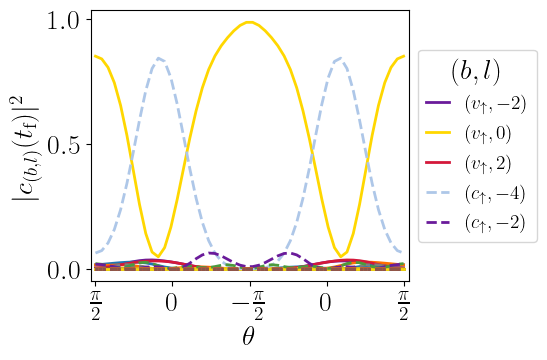

In [36]:
custom_colors = ['#7f7f7f',  '#aec7e8',  '#4B9B3D', '#6A1B9A', '#1F77B4', '#FFD700', '#FF6F00', '#D4183A', '#8C564B',
                 '#8C564B', '#9467BD', '#E377C2', '#1F77B4', '#BCBD22', '#98DF8A', '#FF9896']

cmap = mpl.colors.ListedColormap(custom_colors)
bounds = np.arange(-5.5, 10.6) 
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

all_bl = []
for d in data:
    for info in d['ct_info']:
        bl = (info['b'], info['l'])
        if bl not in all_bl:
            all_bl.append(bl)

all_bl.sort(key=lambda x: (x[0], x[1]))

def format_label(b, l):
    spin = '\\uparrow' if b % 2 == 0 else '\\downarrow'
    state = 'v' if b in [0, 1] else 'c'
    return f'$({state}_{spin},{int(l)})$'

def get_line_style(b):
    styles = ['-', ':', '--', ':']
    return styles[int(b) % len(styles)]

fig, ax = plt.subplots(figsize=(6,4))

for (b, l) in all_bl:
    alphas_plot = []
    cts_plot = []
    for d in data:
        alpha = d['alpha']
        for info in d['ct_info']:
            if info['b'] == b and info['l'] == l:
                alphas_plot.append(alpha)
                cts_plot.append(np.abs(info['ct_end'])**2)
                break

    if len(alphas_plot) > 0:
        line_style = get_line_style(b)
        color = cmap(norm(l)) 

        if np.max(cts_plot) > 0.03:
            label = format_label(b, l)
        else:
            label = None

        ax.plot(alphas_plot, cts_plot, line_style, color=color, lw=2, label=label)

ax.set_xlabel(r'$\theta$', fontsize=20) 
ax.set_xticks([-3*np.pi/2,-np.pi, -np.pi/2, 0, np.pi/2])
ax.set_xticklabels([r'$\frac{\pi}{2}$',r'$0$',r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$'], fontsize=20)  
ax.set_xlim(-3*np.pi/2 - 0.1, np.pi/2 + 0.1) 
ax.set_ylabel(r'$|c_{(b,l)}(t_{\text{f}})|^2$', fontsize=20)
ax.tick_params(axis='y', labelsize=20)  

handles, labels = ax.get_legend_handles_labels()
if labels:
    ax.legend(handles, labels, ncol=1, fontsize=14, 
             title=r"$(b,l)$", handlelength=1.2, 
             loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.close()

fig

## Dichroism

In [5]:
def import_data(psi0band):
    def import_data_kx(kx):
        params_ham = {'k_x': kx, 'k_y': 0.0}
        name = folder0 + 'FigsPaper/{}/Ct_Ax{:.2f}_Ay{}_kx{:.4f}_ky{}.npz'.format(folderin,
            params_env['A_x'], params_env['A_y'], kx, params_ham['k_y'], )
        return np.load(name)
    data= []
    for kx in ks:
        datai= import_data_kx(kx)
        data.append({'tagvec':datai['tagvec'], 'indexCbase' : datai['indexCbase'],
                     'eL': datai['eL'], 'ct':datai['ct'][psi0band],
                     'psit': datai['psitsol'][psi0band]})
    ts = datai['ts']
    return ts, data

## Integrated values:
def lorentzian(x, x0, gamma):
    return (gamma / np.pi) / ((x[:, None] - x0[None, :]) ** 2 + gamma ** 2)

ts = np.linspace(1e-4, 7.1, 2200)
ks = np.arange(-2, 2, 0.05) + 1e-3  ## offset to avoid the numerical degenerancy at the DirP
Aval = 0.7
psi0band = 1

params_env = {'mu_sp': 3.5, 'tau_sp': 1., 'A_x': Aval, 'A_y': Aval, 'A_z': 0.}
tau_valley = -1 #-1, +1
folderin = 'Data_ifs' if tau_valley == +1 else 'Data_ifs_tauNeg'
ts, data = import_data(1)
params_ham = {'k_x': 0, 'k_y': 0.0, 'tau':tau_valley}
params_full = {**params_ham}

solver_dummy = IFS_solver(h_pulse, ts, params_env, params_full, Nmax = 6)

In [9]:
#### Computing of data

oms = np.linspace(-5,5,201)
gamma = 0.2
AlistL = solver_dummy.Alist[:,0]
t_sel = [[0], np.where(AlistL > 1e-3)[0]]

for tau_valley in [-1, 1]:
    folderin = 'Data_ifs' if tau_valley == 1 else 'Data_ifs_tauNeg'
    all_bands_sum_all = []
    all_bands_sum_0 = []
    
    for band in range(4):
        ts, data = import_data(band)
        ct_k = np.array([d['ct'] for d in data])
        tensor_total = []
        
        for t_group in t_sel:
            for ti in t_group:
                eL = np.array([d['eL'][ti] for d in data])
                indexCbase_k = np.array([d['indexCbase'] for d in data])
                col_k = (np.abs(ct_k[:,ti])**2)[:,:indexCbase_k.shape[1]]
                ensL = np.array([eL[k][idx] for k, idx in enumerate(indexCbase_k)])
                
                contribs = [np.multiply(lorentzian(oms, ensL[k], gamma), col_k[k]) 
                            for k in range(len(data))]
                tensor_total.append(contribs)
        
        tensor_total = np.array(tensor_total)
        sum_all = tensor_total.sum(axis=(0,1,3))
        sum_0 = tensor_total[0].sum(axis=(0,2)) 
        
        all_bands_sum_all.append(sum_all)
        all_bands_sum_0.append(sum_0)
    
    np.savez(folder0+'FigsPaper/'+f'data_tau_{tau_valley}_00.npz',
         sum_all=all_bands_sum_all,
         sum_0=all_bands_sum_0,
         oms=oms,
         gamma=gamma)

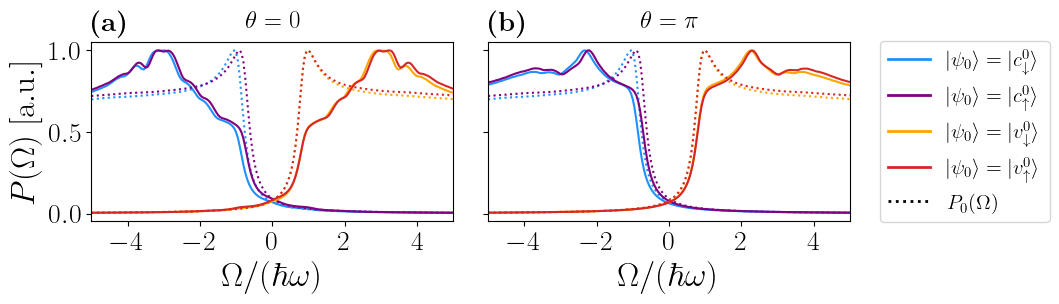

In [13]:
plt.close()

tau_values = [1, -1]
colors_1 = ['dodgerblue', 'purple', 'orange', 'tab:red']
colors_neg1 = ['dodgerblue', 'purple', 'orange', 'tab:red']
styles = {1: '-', -1: '-'}
dos_style = ':' 

color_labels = {
    'dodgerblue': r'$\psi_0 = c_\downarrow$',
    'purple': r'$\psi_0 = c_\uparrow$',
    'orange': r'$\psi_0 = v_\downarrow$',
    'tab:red': r'$\psi_0 = v_\uparrow$' }

fig, axs = plt.subplots(1, 2, figsize=(4.5*2, 3.5), sharey=True)
added_labels = set() 

for i, tau in enumerate(tau_values):
    ax = axs[i]
    data = np.load(folder0 + 'FigsPaper/' + f'data_tau_{tau}_00.npz')
    oms = data['oms']
    
    for band_idx in range(4):
        color = colors_1[band_idx] if tau == 1 else colors_neg1[band_idx]
        
        sum_all = data['sum_all'][band_idx]
        sum_0 = data['sum_0'][band_idx]
        norm_all = sum_all / sum_all.max()
        norm_dos = sum_0 / sum_0.max()
        
        label_main = color_labels[color] if color not in added_labels else None
        line_main, = ax.plot(oms, norm_all, color=color, ls=styles[tau], label=label_main)
        if label_main: added_labels.add(color)
        
        ax.plot(oms, norm_dos, color=color, ls=dos_style, label='' if band_idx > 0 else '_nolegend_')

    
    ax.set(xlabel=r'$\Omega/(\hbar \omega)$', xlim=(-5,5), xticks=np.arange(-4,6,2))
    if i == 0: ax.set(ylabel=r'$P(\Omega) \; \mathrm{[a.u.]}$')

legend_elements = [
    plt.Line2D([0], [0], color='dodgerblue', lw=2, label=r'$| \psi_0  \rangle = | c_\downarrow^0\rangle$'),
    plt.Line2D([0], [0], color='purple', lw=2, label=r'$|\psi_0 \rangle= | c_\uparrow^0\rangle$'),
    plt.Line2D([0], [0], color='orange', lw=2, label=r'$|\psi_0 \rangle= | v_\downarrow^0\rangle$'),
    plt.Line2D([0], [0], color='tab:red', lw=2, label=r'$|\psi_0 \rangle= | v_\uparrow^0\rangle$'),
    plt.Line2D([0], [0], color='black', ls=':', lw=2, label=r'$P_0(\Omega)$') ]

axs[0].set_title(r'$\theta = 0$', fontsize=18, pad=10)
axs[1].set_title(r'$\theta = \pi$', fontsize=18, pad=10)
fig.legend(handles=legend_elements, 
           bbox_to_anchor=(1.2, 0.55), 
           loc='center right',
           fontsize=15)

createletters(axs.ravel(), coord=[0.0, 1.065])
plt.tight_layout()
plt.show()

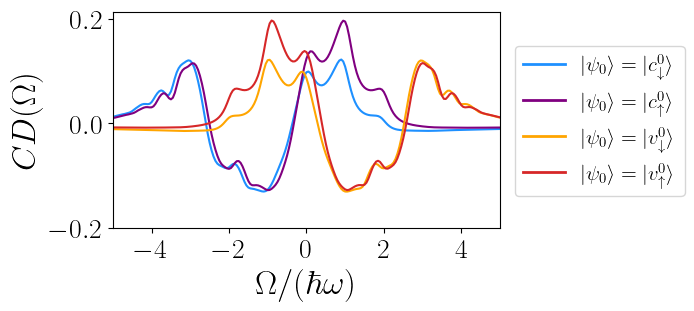

In [14]:
data_pos = np.load(folder0 + 'FigsPaper/' +'data_tau_1_00.npz')
data_neg = np.load(folder0 + 'FigsPaper/' +'data_tau_-1_00.npz')
oms = data_pos['oms']

fig, ax = plt.subplots(figsize=(5.5,3.5))
colors = ['dodgerblue', 'purple', 'orange', 'tab:red']

for band in range(4):
    pos = data_pos['sum_all'][band]/np.sum(data_pos['sum_all'][band])
    neg = data_neg['sum_all'][band]/np.sum(data_neg['sum_all'][band])
    diff = (pos-neg)/(pos+neg)
    
    ax.plot(oms, diff, 
            color=colors[band])

ax.set(ylabel=r'$CD (\Omega)$', xlabel=r'$\Omega/(\hbar \omega)$',
       xlim=(-5,5), xticks=np.arange(-4,6,2), yticks=[-0.2,0,0.2])

legend_elements = [
    plt.Line2D([0], [0], color='dodgerblue', lw=2, label=r'$| \psi_0  \rangle = | c_\downarrow^0\rangle$'),
    plt.Line2D([0], [0], color='purple', lw=2, label=r'$|\psi_0 \rangle= | c_\uparrow^0\rangle$'),
    plt.Line2D([0], [0], color='orange', lw=2, label=r'$|\psi_0 \rangle= | v_\downarrow^0\rangle$'),
    plt.Line2D([0], [0], color='tab:red', lw=2, label=r'$|\psi_0 \rangle= | v_\uparrow^0\rangle$')
]


fig.legend(handles=legend_elements, 
           bbox_to_anchor=(1.3, 0.6), 
           loc='center right',
           fontsize=15)
plt.tight_layout()
plt.show()